This code was created with the help of AI (ChatGPT).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "data/GiveMeSomeCredit-training.csv"
df = pd.read_csv(file_path)

sns.set_style("whitegrid")

In [3]:
# Display basic info
print("Dataset Info:")
print(df.info())

print("\nFirst few rows of the dataset:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0



Missing Values in Dataset:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


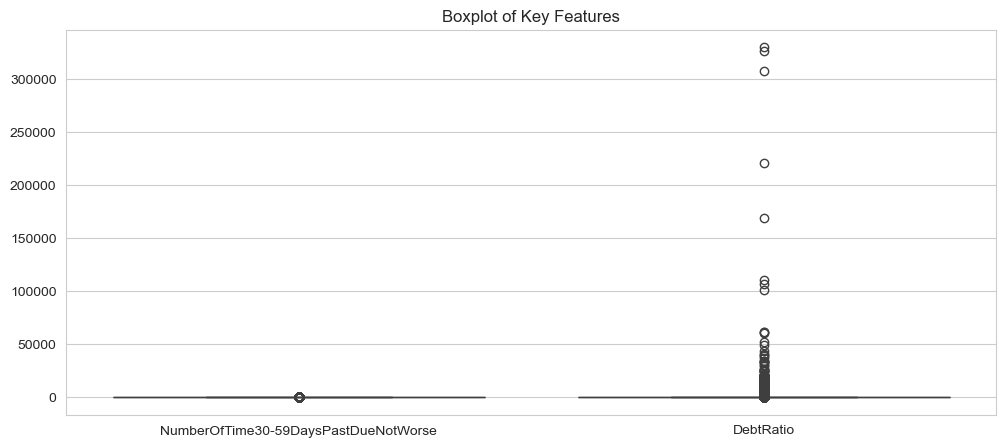

In [4]:
# Data Cleanup
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Fill missing values (e.g., replacing NaNs in numerical columns with median)
df.fillna(df.median(), inplace=True)

# Check for outliers in key numeric columns
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio']])
plt.title("Boxplot of Key Features")
plt.show()

/var/folders/lt/p6lwj8pj7vgcbcr0ylpxl6940000gn/T/ipykernel_65798/2756099388.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_delinquency = df.groupby("age_group")["SeriousDlqin2yrs"].mean()
/var/folders/lt/p6lwj8pj7vgcbcr0ylpxl6940000gn/T/ipykernel_65798/2756099388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_delinquency.index.astype(str), y=age_delinquency.values, palette="coolwarm")


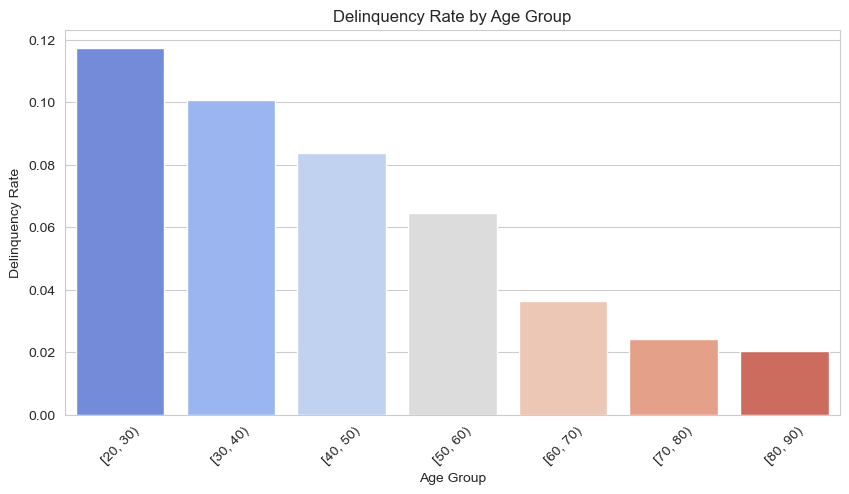

In [5]:
# Delinquency Rate by Age Group
df["age_group"] = pd.cut(df["age"], bins=[20, 30, 40, 50, 60, 70, 80, 90], right=False)
age_delinquency = df.groupby("age_group")["SeriousDlqin2yrs"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_delinquency.index.astype(str), y=age_delinquency.values, palette="coolwarm")
plt.title("Delinquency Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Delinquency Rate")
plt.xticks(rotation=45)
plt.show()

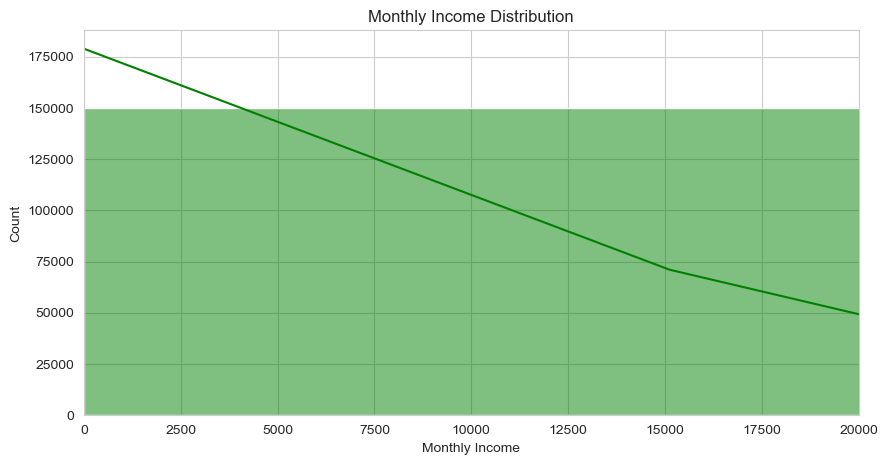

In [6]:
# Monthly Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["MonthlyIncome"].dropna(), bins=50, kde=True, color="green")
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.xlim([0, 20000])  # Limit extreme values for better visualization
plt.show()

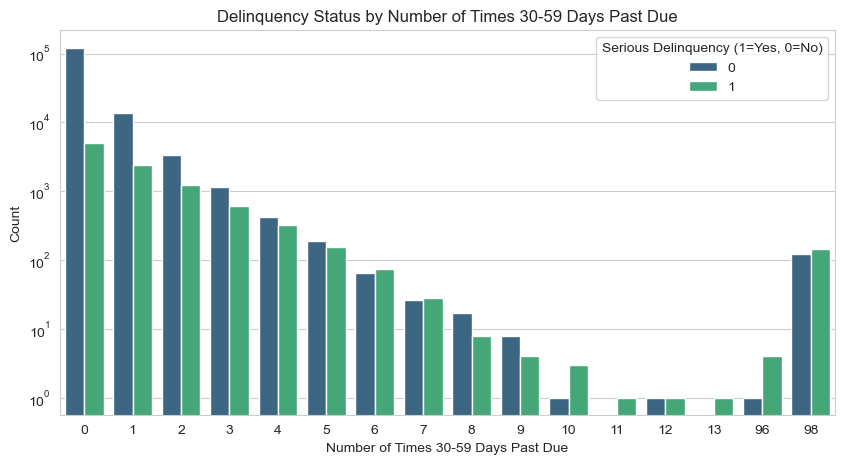

In [7]:
# Analysis of NumberOfTime30-59DaysPastDueNotWorse vs. SeriousDlqin2yrs
plt.figure(figsize=(10, 5))
sns.countplot(x=df["NumberOfTime30-59DaysPastDueNotWorse"], hue=df["SeriousDlqin2yrs"], palette="viridis")
plt.title("Delinquency Status by Number of Times 30-59 Days Past Due")
plt.xlabel("Number of Times 30-59 Days Past Due")
plt.ylabel("Count")
plt.yscale("log")  # Log scale for better visualization
plt.legend(title="Serious Delinquency (1=Yes, 0=No)")
plt.show()

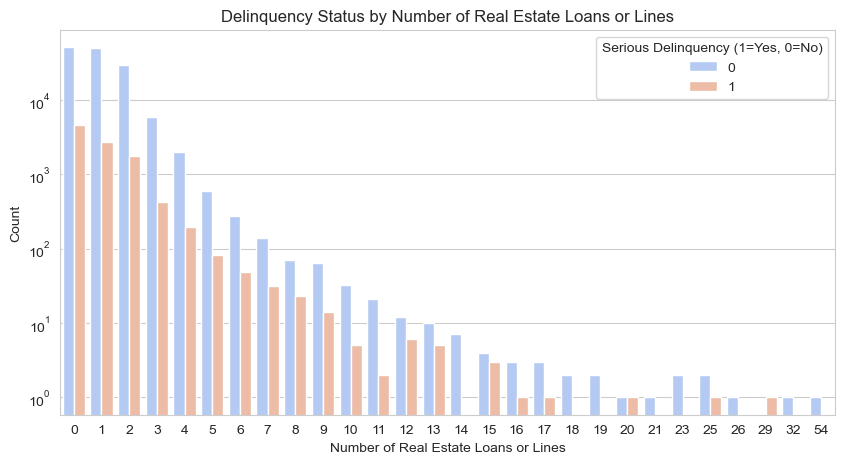

In [8]:
# Analysis of NumberRealEstateLoansOrLines vs. SeriousDlqin2yrs
plt.figure(figsize=(10, 5))
sns.countplot(x=df["NumberRealEstateLoansOrLines"], hue=df["SeriousDlqin2yrs"], palette="coolwarm")
plt.title("Delinquency Status by Number of Real Estate Loans or Lines")
plt.xlabel("Number of Real Estate Loans or Lines")
plt.ylabel("Count")
plt.yscale("log")  # Log scale to handle skewed data
plt.legend(title="Serious Delinquency (1=Yes, 0=No)")
plt.show()

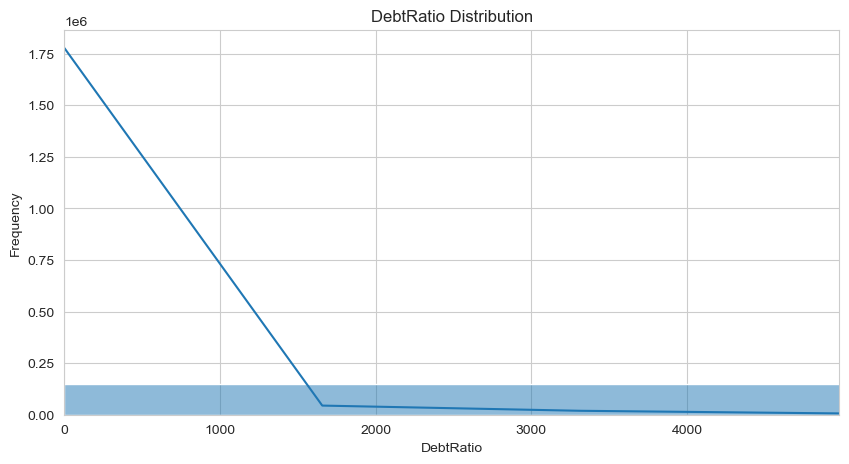

In [9]:
# Checking for extreme values in DebtRatio
plt.figure(figsize=(10,5))
sns.histplot(df['DebtRatio'], bins=50, kde=True)
plt.title("DebtRatio Distribution")
plt.xlabel("DebtRatio")
plt.ylabel("Frequency")
plt.xlim(0, df['DebtRatio'].quantile(0.99))  # Limit x-axis for readability
plt.show()

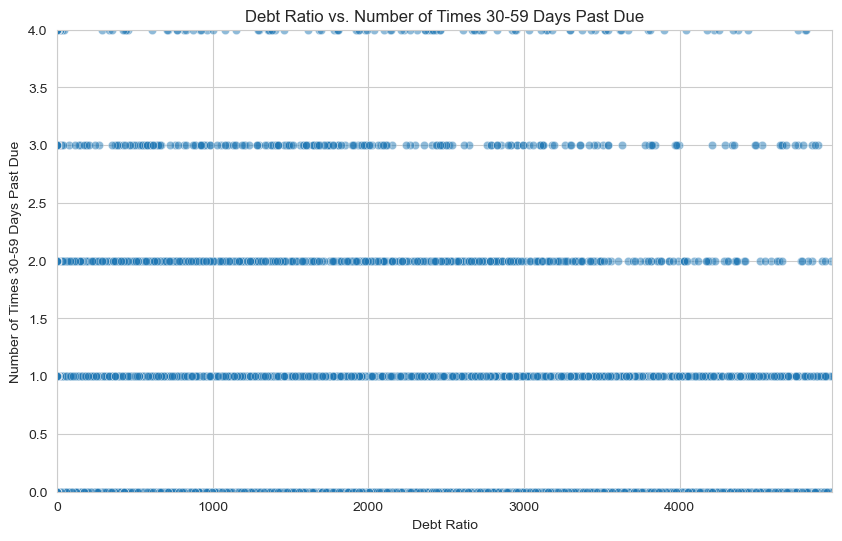

In [10]:
# Explore Biases in Key Features
# Relationship between NumberOfTime30-59DaysPastDueNotWorse and DebtRatio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DebtRatio', y='NumberOfTime30-59DaysPastDueNotWorse', alpha=0.5)
plt.title("Debt Ratio vs. Number of Times 30-59 Days Past Due")
plt.xlabel("Debt Ratio")
plt.ylabel("Number of Times 30-59 Days Past Due")
plt.xlim(0, df['DebtRatio'].quantile(0.99))  # Trim extreme values for better visualization
plt.ylim(0, df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.99))
plt.show()

In [11]:
# Summarizing Findings
print("\nSummary of Findings:")

# Age Bias
age_median = df['age'].median()
print(f"- The median age in the dataset is {age_median}. If younger or older individuals are underrepresented, bias may exist.")

# DebtRatio Outliers
high_debt_ratio_count = (df['DebtRatio'] > df['DebtRatio'].quantile(0.99)).sum()
print(f"- {high_debt_ratio_count} records have extremely high DebtRatios (above 99th percentile), which might indicate errors or special cases.")

# NumberOfTime30-59DaysPastDueNotWorse Bias
past_due_outliers = (df['NumberOfTime30-59DaysPastDueNotWorse'] > df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.99)).sum()
print(f"- {past_due_outliers} individuals have unusually high occurrences of late payments (above 99th percentile), which could suggest reporting issues.")

# Relationship Insight
print("- The scatterplot suggests a potential correlation between DebtRatio and missed payments. Higher Debt Ratios could be linked to financial stress.")



Summary of Findings:
- The median age in the dataset is 52.0. If younger or older individuals are underrepresented, bias may exist.
- 1500 records have extremely high DebtRatios (above 99th percentile), which might indicate errors or special cases.
- 850 individuals have unusually high occurrences of late payments (above 99th percentile), which could suggest reporting issues.
- The scatterplot suggests a potential correlation between DebtRatio and missed payments. Higher Debt Ratios could be linked to financial stress.


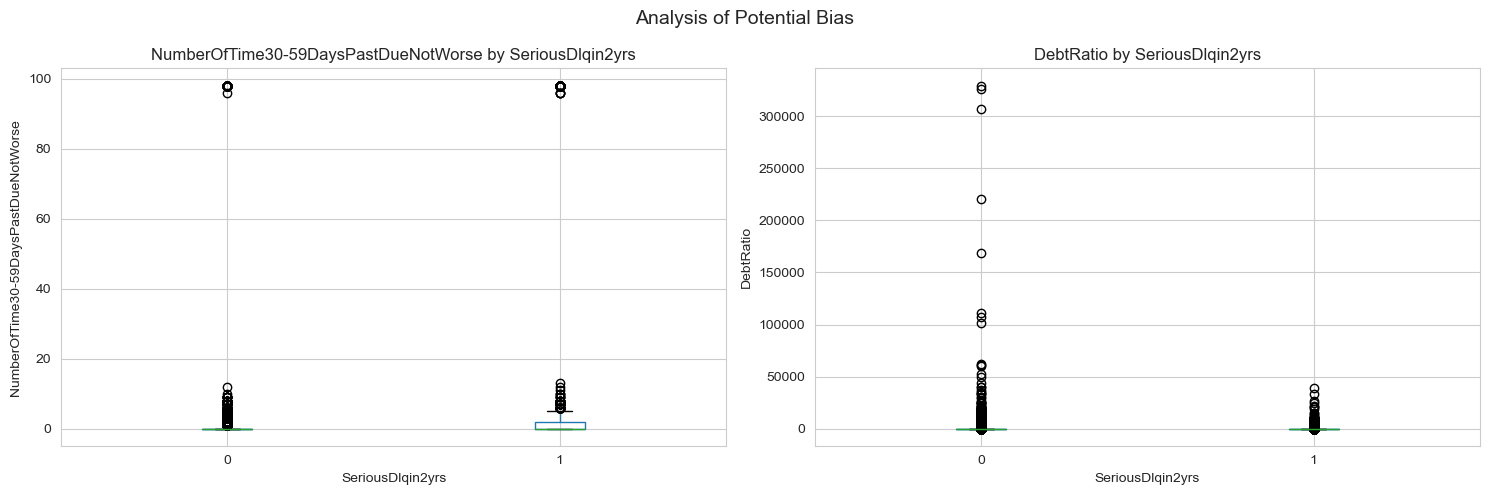

In [12]:
# Modeling using normal df
# Target variable of interest
target_variable = "SeriousDlqin2yrs"
features_to_explore = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio"
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

for i, feature in enumerate(features_to_explore):
    df.boxplot(column=feature, by=target_variable, ax=axes[i])
    axes[i].set_title(f"{feature} by {target_variable}")
    axes[i].set_xlabel(target_variable)
    axes[i].set_ylabel(feature)

plt.suptitle("Analysis of Potential Bias", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Focus on relevant features
features = ["NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio"]
target = "SeriousDlqin2yrs"

# Check class balance in target variable
print("Class Distribution:")
print(df[target].value_counts(normalize=True))  # Check imbalance

Class Distribution:
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


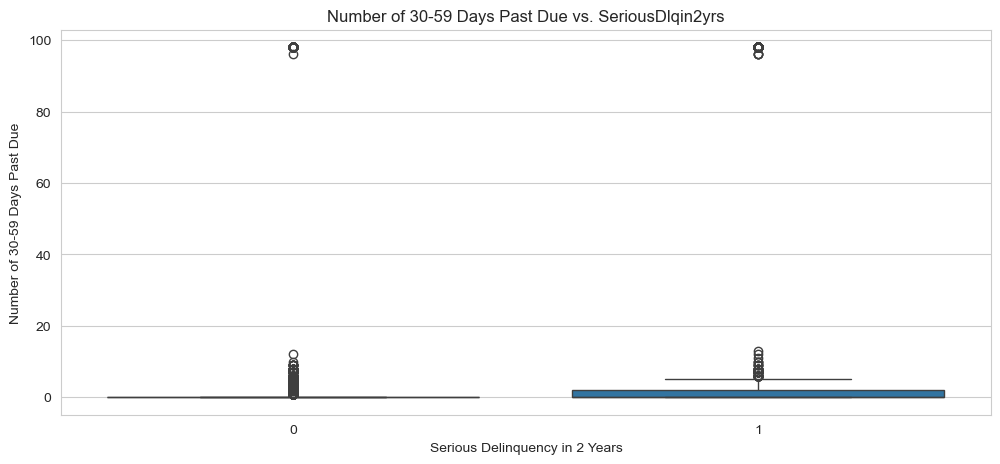

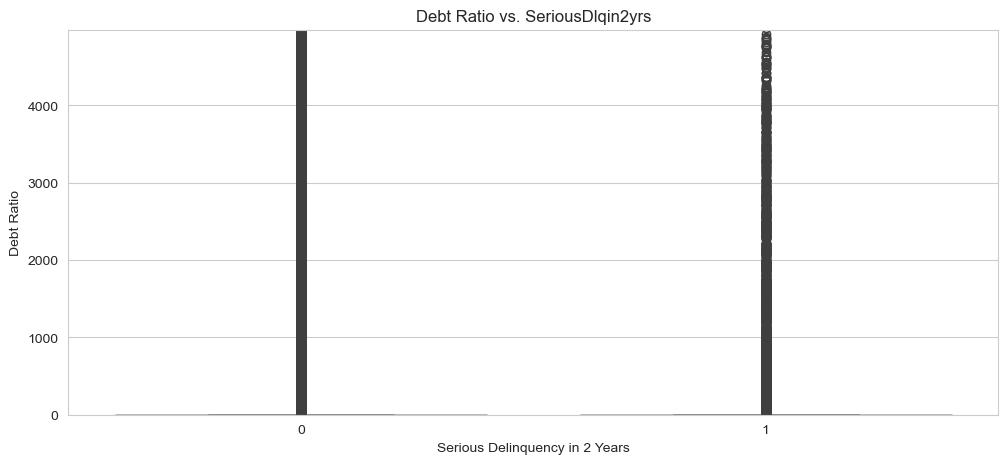

In [16]:
# 1. Compare distributions of features across target classes
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x=target, y="NumberOfTime30-59DaysPastDueNotWorse")
plt.title("Number of 30-59 Days Past Due vs. SeriousDlqin2yrs")
plt.xlabel("Serious Delinquency in 2 Years")
plt.ylabel("Number of 30-59 Days Past Due")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x=target, y="DebtRatio")
plt.title("Debt Ratio vs. SeriousDlqin2yrs")
plt.xlabel("Serious Delinquency in 2 Years")
plt.ylabel("Debt Ratio")
plt.ylim(0, df["DebtRatio"].quantile(0.99))  # Remove extreme outliers for better visualization
plt.show()

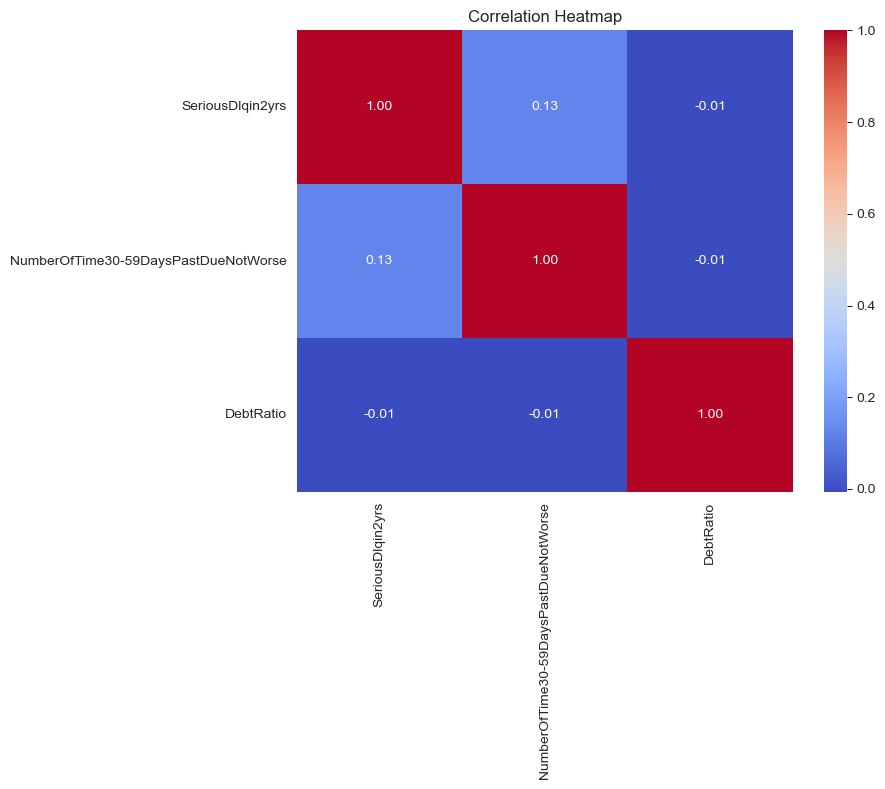

In [17]:
# 2. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[[target] + features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# 3. Logistic Regression Model
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

# Model evaluation
y_pred = log_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     41992
           1       0.55      0.02      0.03      3008

    accuracy                           0.93     45000
   macro avg       0.74      0.51      0.50     45000
weighted avg       0.91      0.93      0.90     45000



In [19]:
# Feature importance
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": log_model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print("\nFeature Importance from Logistic Regression:")
print(feature_importance)


Feature Importance from Logistic Regression:
                                Feature  Coefficient
0  NumberOfTime30-59DaysPastDueNotWorse     0.042063
1                             DebtRatio    -0.000055
